In [2]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset
df = pd.read_csv('loan_detection.csv')
df.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


# EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(41188, 60)

In [5]:
# we have 60 features and around 41,000 data points

In [6]:
df.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [7]:
# no missing values in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [9]:
# all data types are numeric => no encoding required

In [10]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# checking the data balance
df['Loan_Status_label'].value_counts()

Loan_Status_label
0    36548
1     4640
Name: count, dtype: int64

In [12]:
print(round(len(df[df['Loan_Status_label'] == 0]) / len(df), 2))
print(round(len(df[df['Loan_Status_label'] == 1]) / len(df), 2))

0.89
0.11


In [13]:
# data is highly imbalanced as 89 percent shows rejection and only 11 percent shows acceptance

In [14]:
# to balance the data upsampling is more suitable as downsampling will leave us with very little data

In [15]:
X = df.drop(['Loan_Status_label'], axis = 1)
y = df['Loan_Status_label']

In [16]:
X

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [17]:
X.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [18]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 41188, dtype: int64

In [19]:
# oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.8, random_state = 42)
X, y = smote.fit_resample(X, y)

In [20]:
X

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65781,57,3,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
65782,25,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
65783,48,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
65784,43,1,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
y

0        0
1        0
2        0
3        0
4        0
        ..
65781    1
65782    1
65783    1
65784    1
65785    1
Name: Loan_Status_label, Length: 65786, dtype: int64

In [22]:
y.value_counts()

Loan_Status_label
0    36548
1    29238
Name: count, dtype: int64

In [23]:
print(round(len(y[y == 0]) / len(y), 2))
print(round(len(y[y == 1]) / len(y), 2))

0.56
0.44


In [24]:
# the data is now balanced

<Axes: xlabel='age', ylabel='Count'>

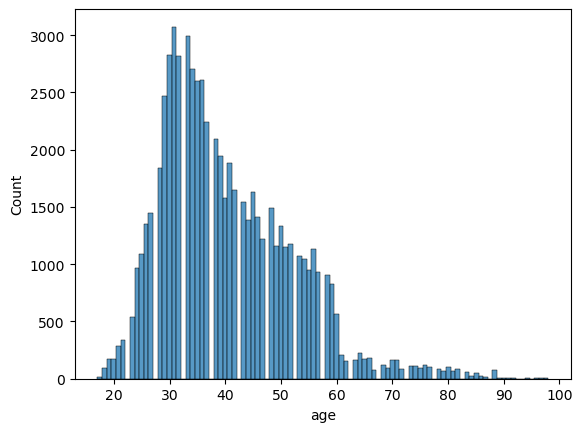

In [25]:
sns.histplot(X['age'])

In [26]:
X['age'].skew()

0.9587473139009497

In [27]:
# the data distribution is nearly guassian

<Axes: xlabel='campaign', ylabel='Count'>

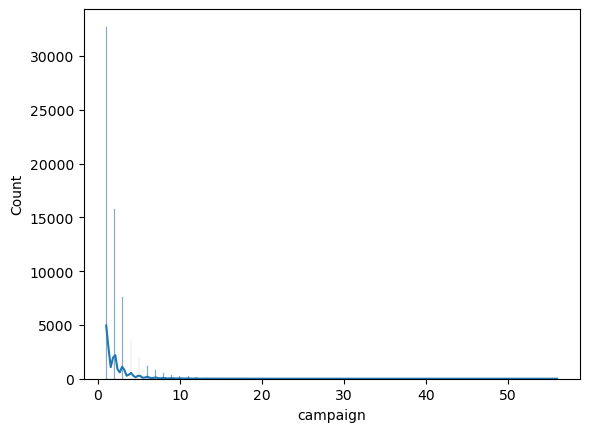

In [28]:
sns.histplot(X['campaign'], kde = True)

In [29]:
# campaign is a discrete feature

In [30]:
X['campaign'].nunique()

42

<Axes: xlabel='pdays', ylabel='Density'>

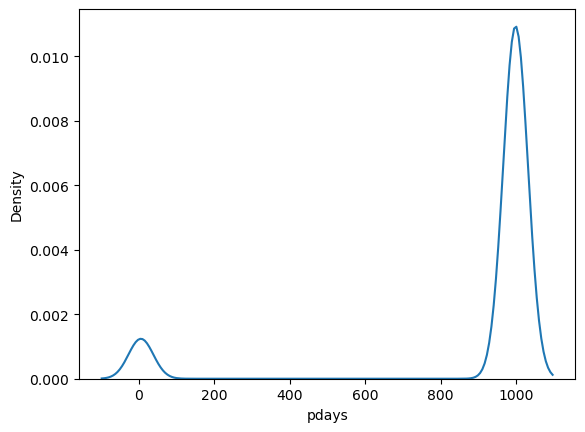

In [31]:
sns.kdeplot(X['pdays'])

In [32]:
X['pdays'].value_counts()

pdays
999    59054
3       2174
6       1994
2        394
5        286
4        262
9        224
12       220
10       195
13       163
7        163
11       120
14       102
8         94
15        91
1         80
0         56
16        35
18        17
17        17
21        11
19         9
22         7
20         7
24         6
25         2
26         2
27         1
Name: count, dtype: int64

In [33]:
# most data points have 999 pdays

In [34]:
# most features have binary values

binary_features = []
for i in X.columns:
    if(X[i].nunique() == 2):
        binary_features.append(i)

binary_features

['no_previous_contact',
 'not_working',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'pout

In [35]:
len(X.columns) - len(binary_features)

4

In [36]:
for i in X.columns:
    if(i not in binary_features):
        print(i)

age
campaign
pdays
previous


<Axes: xlabel='previous', ylabel='Count'>

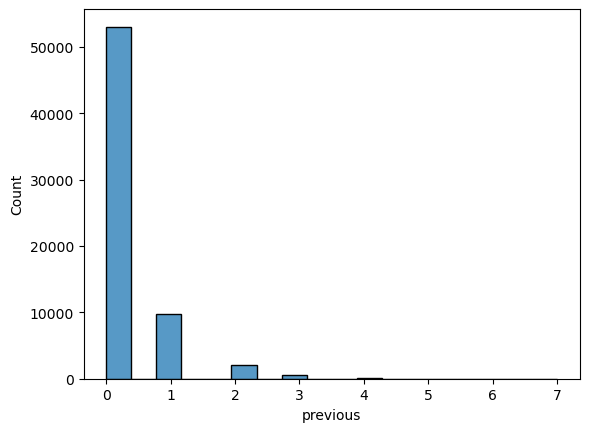

In [37]:
sns.histplot(X['previous'])

In [38]:
# previous is a discrete feature with most values as 0

In [39]:
def outliers(feature):
    outliers = []
    Q1 = X[feature].percentile(25)
    Q3 = percentile(X[feature],75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for i in X[feature]:
        if(i < lower_bound or i > upper_bound):
            outliers.append(i)

    return outliers

In [40]:
# since only 4 numeric features are present lets first train the model with complete dataset

# feature selection

In [41]:
for i in X.columns:
    for j in X.columns:
        if(i != j and X[i].corr(X[j]) >= 0.7):
            print(i,j)

pdays no_previous_contact
no_previous_contact pdays
not_working job_retired
job_retired not_working
housing_unknown loan_unknown
loan_unknown housing_unknown


In [42]:
# the above features are highly correlatef to each other hence only one from each pair is sufficient for training the data

In [43]:
X.drop(columns = ['pdays', 'not_working', 'loan_unknown'], inplace = True)

In [44]:
X.columns

Index(['age', 'campaign', 'previous', 'no_previous_contact', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',


# feature scaling

In [45]:
# for better performance, we should scale the features 

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [48]:
X

array([[ 1.33138285, -0.53101926, -0.42875833, ..., -0.32391793,
         0.51635801, -0.31824356],
       [ 1.4159749 , -0.53101926, -0.42875833, ..., -0.32391793,
         0.51635801, -0.31824356],
       [-0.27586605, -0.53101926, -0.42875833, ..., -0.32391793,
         0.51635801, -0.31824356],
       ...,
       [ 0.65464647, -0.11477102,  1.26105088, ..., -0.32391793,
        -1.93664083,  3.14224745],
       [ 0.23168623, -0.53101926, -0.42875833, ..., -0.32391793,
         0.51635801, -0.31824356],
       [-0.52964219, -0.11477102,  1.26105088, ..., -0.32391793,
        -1.93664083,  3.14224745]])

In [49]:
# splitting into train and test data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [51]:
X_train

array([[-0.27586605,  0.30147721, -0.42875833, ..., -0.32391793,
         0.51635801, -0.31824356],
       [-0.69882629, -0.11477102, -0.42875833, ..., -0.32391793,
         0.51635801, -0.31824356],
       [-0.10668196, -0.53101926, -0.42875833, ..., -0.32391793,
         0.51635801, -0.31824356],
       ...,
       [-0.78341834, -0.53101926, -0.42875833, ..., -0.32391793,
         0.51635801, -0.31824356],
       [-0.02208991, -0.11477102, -0.42875833, ..., -0.32391793,
         0.51635801, -0.31824356],
       [-0.95260243, -0.11477102, -0.42875833, ..., -0.32391793,
         0.51635801, -0.31824356]])

In [52]:
X_train.shape

(49339, 56)

In [53]:
# approxiamtely 50000 data points will be used for training the model and rest for evaluation

# model selection

In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [55]:
print(f'Train Accuracy: {round(lr.score(X_train, y_train),2) * 100}%')
print(f'Test Accuracy: {round(lr.score(X_test, y_test),2) * 100}%')

Train Accuracy: 93.0%
Test Accuracy: 93.0%


In [56]:
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [57]:
print(f'Train Accuracy: {round(dtree.score(X_train, y_train),2) * 100}%')
print(f'Test Accuracy: {round(dtree.score(X_test, y_test),2) * 100}%')

Train Accuracy: 96.0%
Test Accuracy: 89.0%


In [58]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [59]:
print(f'Train Accuracy: {round(knn.score(X_train, y_train),2) * 100}%')
print(f'Test Accuracy: {round(knn.score(X_test, y_test),2) * 100}%')

Train Accuracy: 92.0%
Test Accuracy: 89.0%


In [60]:
# of the 3 models, decision tree performs the best

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"],
    'max_features' : ["auto", "sqrt", "log2"],
    'max_depth' : list(range(10,21)),
}

# hyper parameter tuning

In [63]:
model = DecisionTreeClassifier(random_state = 42)
grid = GridSearchCV(model,param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 198 candidates, totalling 990 fits
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=0.742 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=0.740 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=0.730 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=0.751 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=0.797 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=0.781 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=aut

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [64]:
# prediction

In [65]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# evaluation

In [67]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     27468
           1       1.00      0.99      0.99     21871

    accuracy                           1.00     49339
   macro avg       1.00      1.00      1.00     49339
weighted avg       1.00      1.00      1.00     49339



In [68]:
accuracy_score(y_train, y_pred_train)

0.9955613206591135

In [69]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      9080
           1       0.87      0.90      0.88      7367

    accuracy                           0.89     16447
   macro avg       0.89      0.89      0.89     16447
weighted avg       0.89      0.89      0.89     16447



In [70]:
accuracy_score(y_test, y_pred_test)

0.8921383838997994

In [71]:
# as the accuracy is satisfactory, outliers did not have much effect on the performance of the model

In [72]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)